# Aprenentatge supervisat classificació

In [1]:
import numpy as np
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost.sklearn import XGBClassifier

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## Exercici 1

**Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).**

### Dataset

In [2]:
# Load the dataframe
df = pd.read_csv('DelayedFlights.csv')

In [3]:
# View the dataset
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,...,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,1002.00,1000,WN,...,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,...,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,...,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,...,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [4]:
df.shape

(1936758, 30)

Les columnes que conté són:
- **Unnamed**: índex
- **Year**: any del vol
- **Month**: mes del vol
- **DayofMonth**: dia del vol
- **DayOfWeek**: dia de la setmana del vol 
- **DepTime**: hora de sortida del vol real
- **CRSDepTime**: hora de sortida del vol programada
- **ArrTime**: hora d'arribada del vol real
- **CRSArrTime**: hora d'arribada del vol programada
- **UniqueCarrier**: aerolínea
- **FlightNum**: número de vol
- **TailNum**: número de cua de l'avió
- **ActualElapsedTime**: temps de vol real en minuts
- **CRSElapsedTime**: temps de vol programat en minuts
- **AirTime**: temps en l'aire en minuts
- **ArrDelay**: retràs en l'hora d'arribada en minuts
- **DepDelay**: retràs en l'hora de sortida en minuts
- **Origin**: aeroport de sortida
- **Dest**: aeroport de destinació
- **Distance**: distància del vol
- **Taxiln**: temps de taxi de l'arribada en minuts
- **TaxiOut**: temps de taxi de la sortida en minuts
- **Cancelled**: cancel·lació
- **CancellationCode**: codi de cancel·lació
- **Diverted**: desviat
- **CarrierDelay**: retràs atribuït a l'aerolínea en minuts
- **WeatherDelay**: retràs atribuït al clima en minuts
- **NASDelay**: retràs atribuït al sistema d'aviació nacional en minuts
- **SecurityDelay**: retràs atribuït a la seguretat en minuts
- **LateAircraftDelay**: retràs atribuït a l'arribada amb retràs d'un avió en minuts

In [5]:
# Column description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.00,NaN,NaN,NaN,3341651.15,2066064.96,0.00,1517452.50,3242558.00,4972466.75,7009727.00
Year,1936758.00,NaN,NaN,NaN,2008.00,0.00,2008.00,2008.00,2008.00,2008.00,2008.00
Month,1936758.00,NaN,NaN,NaN,6.11,3.48,1.00,3.00,6.00,9.00,12.00
DayofMonth,1936758.00,NaN,NaN,NaN,15.75,8.78,1.00,8.00,16.00,23.00,31.00
DayOfWeek,1936758.00,NaN,NaN,NaN,3.98,2.00,1.00,2.00,4.00,6.00,7.00
DepTime,1936758.00,NaN,NaN,NaN,1518.53,450.49,1.00,1203.00,1545.00,1900.00,2400.00
CRSDepTime,1936758.00,NaN,NaN,NaN,1467.47,424.77,0.00,1135.00,1510.00,1815.00,2359.00
ArrTime,1929648.00,NaN,NaN,NaN,1610.14,548.18,1.00,1316.00,1715.00,2030.00,2400.00
CRSArrTime,1936758.00,NaN,NaN,NaN,1634.22,464.63,0.00,1325.00,1705.00,2014.00,2400.00
UniqueCarrier,1936758,20,WN,377602,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Features and target variable

In [6]:
features = df.select_dtypes(include=np.number).columns.tolist()
features = [f for f in features if f not in ['Unnamed: 0', 'ArrDelay']]

In [7]:
target = 'is_delayed'

In [8]:
# Binarization of the target variable
df[target] = df.ArrDelay > 0

# Numerical encoding of the target variable
le = LabelEncoder()
le.fit(df[target])
df[target] = le.transform(df[target])

In [9]:
# Target variable imbalance
df[target].value_counts()

1    1723415
0     213343
Name: is_delayed, dtype: int64

### Missing values

In [10]:
# Remove rows without a target value
df = df[~df[target].isnull()]

In [11]:
# Number of missing values per column
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
is_delayed                0
dtype: int64

In [12]:
# Get the feature columns with nulls
null_cols = df[features+[target]].isnull().sum().rename_axis('name').reset_index(name='nulls')
null_cols = null_cols[null_cols.nulls>0].name.tolist()

In [13]:
# Imputation of missing values with the median of the feature 
for col in null_cols:
    df[col].fillna(df[col].median(), inplace = True)

### Feature correlation

In [14]:
df[features + [target]].corr()[target]

Year                  nan
Month               -0.02
DayofMonth          -0.00
DayOfWeek           -0.01
DepTime              0.06
CRSDepTime           0.04
ArrTime              0.00
CRSArrTime           0.02
FlightNum            0.06
ActualElapsedTime   -0.06
CRSElapsedTime      -0.14
AirTime             -0.09
DepDelay             0.20
Distance            -0.13
TaxiIn               0.07
TaxiOut              0.12
Cancelled           -0.05
Diverted            -0.18
CarrierDelay         0.11
WeatherDelay         0.05
NASDelay             0.11
SecurityDelay        0.01
LateAircraftDelay    0.11
is_delayed           1.00
Name: is_delayed, dtype: float64

### Feature multicollinearity

In [15]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# Calculating VIF for each feature
df_features = df[features]
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(features))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
9,ActualElapsedTime,3027.44
11,AirTime,2785.89
15,TaxiOut,118.91
10,CRSElapsedTime,79.38
0,Year,40.00
12,DepDelay,39.92
13,Distance,35.10
18,CarrierDelay,19.96
22,LateAircraftDelay,18.84
14,TaxiIn,17.12


Observem que tenim un gran número de variables amb un VIF molt elevat. El que farem és eliminar d'una en una les variables amb el VIF més elevat fins a obtindre un coeficient acceptable. Primer de tot eliminarem ActualElapsedTime.

In [16]:
# Remove the feature with the highest VIF
del df_features['ActualElapsedTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
9,CRSElapsedTime,79.26
10,AirTime,60.98
0,Year,39.99
11,DepDelay,39.64
12,Distance,35.09
17,CarrierDelay,19.83
21,LateAircraftDelay,18.71
19,NASDelay,11.60
18,WeatherDelay,5.27
4,DepTime,5.18


In [17]:
# Remove the feature with the highest VIF
del df_features['CRSElapsedTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
0,Year,37.37
11,Distance,26.93
9,AirTime,26.35
10,DepDelay,24.05
16,CarrierDelay,12.29
20,LateAircraftDelay,11.67
18,NASDelay,6.92
4,DepTime,5.18
5,CRSDepTime,5.10
17,WeatherDelay,3.53


In [18]:
# Remove the feature with the highest VIF
del df_features['Year']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
8,AirTime,86.08
10,Distance,72.06
3,DepTime,64.04
4,CRSDepTime,63.79
6,CRSArrTime,38.44
9,DepDelay,38.32
5,ArrTime,16.03
19,LateAircraftDelay,14.75
15,CarrierDelay,13.55
17,NASDelay,7.52


In [19]:
# Remove the feature with the highest VIF
del df_features['AirTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
3,DepTime,63.90
4,CRSDepTime,63.76
6,CRSArrTime,38.37
8,DepDelay,35.13
5,ArrTime,15.92
18,LateAircraftDelay,13.57
14,CarrierDelay,12.44
16,NASDelay,6.73
11,TaxiOut,4.93
2,DayOfWeek,4.49


In [20]:
# Remove the feature with the highest VIF
del df_features['DepTime']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(len(df_features.columns))]

# Show VIF values
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
5,CRSArrTime,37.53
7,DepDelay,34.99
3,CRSDepTime,24.68
4,ArrTime,15.49
17,LateAircraftDelay,13.56
13,CarrierDelay,12.43
15,NASDelay,6.73
10,TaxiOut,4.93
2,DayOfWeek,4.49
1,DayofMonth,3.90


Ara hauriem d'eliminar la feature DepDelay però ho deixarem per l'últim exercici. Així doncs, hem eliminat:
- ActualElapsedTime
- CRSElapsedTime
- Year
- AirTime
- DepTime

A més a més, també eliminem Cancelled i Diverted ja que només tenen 1 valor i per tant no són informatius.

In [21]:
features = df_features.columns.tolist()
features.remove('Cancelled')
features.remove('Diverted')

In [22]:
# Due to time consumption of computations, we'll work with a sample of the data
# To fix class imbalance, the selection will be stratified
sample = pd.concat([df[df[target] == 1].sample(10000, random_state=1),
                    df[df[target] == 0].sample(10000, random_state=1)])

In [23]:
y = sample[target]

In [24]:
X = sample[features]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

### Training models

In [26]:
# LazyClassifier automatically imputes null values with SimpleImputer,
# normalizes values with StandardScaler and encodes categorical variables with OneHotEncoder / OrdinalEncoder
clf = LazyClassifier(predictions=True, random_state=42)

In [27]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:59<00:00,  2.05s/it]


## Exercici 2

**Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.**

La precisió, precisió balancejada, àrea sota la corba i puntuació F1 dels models entrenats són:

In [28]:
models.sort_values('Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.92,0.92,0.92,0.65
LGBMClassifier,0.90,0.90,0.90,0.90,0.18
RandomForestClassifier,0.87,0.87,0.87,0.87,2.09
ExtraTreesClassifier,0.87,0.87,0.87,0.87,1.48
AdaBoostClassifier,0.86,0.86,0.86,0.86,0.82
BaggingClassifier,0.86,0.86,0.86,0.86,0.70
GaussianNB,0.86,0.86,0.86,0.85,0.03
LinearSVC,0.86,0.86,0.86,0.85,0.98
SGDClassifier,0.85,0.86,0.86,0.85,0.07


Si ens quedem amb els 3 millors models per cadascuna de les mètriques, obtenim el XGBClassifier, LGBMClassifier, RandomForestClassifier i GaussianNB.

In [29]:
performances = pd.DataFrame({'Model':[]})
metrics = [col for col in models.columns if col != 'Time Taken']
for metric in metrics:
    tmp = models[metric].nlargest(3).reset_index()
    performances = performances.merge(tmp, how='outer', on='Model')
performances

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score
0,XGBClassifier,0.92,0.92,0.92,0.92
1,LGBMClassifier,0.90,0.90,0.90,0.90
2,RandomForestClassifier,0.87,0.87,0.87,0.87


També podem extreure la matriu de confiança d'aquests models i calcular mètriques més avançades com el coeficient de correlació de matthews:

In [30]:
for model in performances.Model:
    print(model+':')
    print('='*(len(model)+1))
    print(f'MCC: {round(matthews_corrcoef(y_test, predictions[model]),3)}')
    print('Confusion matrix:')
    print(confusion_matrix(y_test, predictions[model]))
    print()

XGBClassifier:
MCC: 0.844
Confusion matrix:
[[2354   77]
 [ 323 2246]]

LGBMClassifier:
MCC: 0.807
Confusion matrix:
[[2350   81]
 [ 422 2147]]

RandomForestClassifier:
MCC: 0.751
Confusion matrix:
[[2331  100]
 [ 556 2013]]



## Exercici 3

**Entrena’ls utilitzant els diferents paràmetres que admeten.**

### XGBClassifier

Best: -0.173831 using {'learning_rate': 0.2, 'n_estimators': 300}


Text(0, 0.5, 'Log Loss')

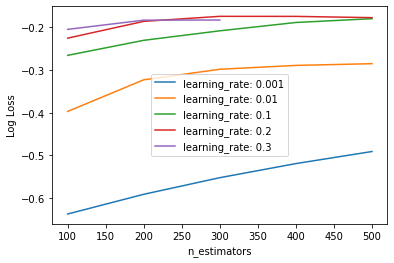

In [31]:
# Create the classifier
clf = XGBClassifier()

# Grid search 
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300, 400, 500]}
grid_search = GridSearchCV(clf, param_grid, scoring="neg_log_loss")
grid_result = grid_search.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
scores = np.array(means).reshape(len(param_grid['learning_rate']), len(param_grid['n_estimators']))
for i, value in enumerate(param_grid['learning_rate']):
    pyplot.plot(param_grid['n_estimators'], scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

In [32]:
# Save the best predictor
clf = XGBClassifier(learning_rate=0.2, n_estimators=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
performances.loc[performances.shape[0]] = ['XGBClassifier_PARAM', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### LGBMClassifier

Best: -0.204031 using {'max_depth': 100, 'num_leaves': 100}


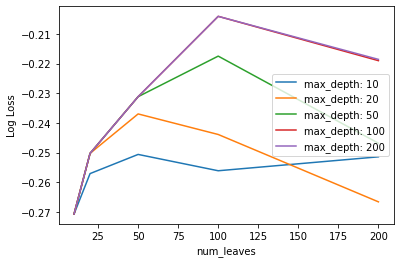

In [33]:
# Create the classifier
clf = LGBMClassifier()

# Grid search 
param_grid = {'max_depth': [10, 20, 50, 100, 200], 'num_leaves': [10, 20, 50, 100, 200]}
grid_search = GridSearchCV(clf, param_grid, scoring="neg_log_loss")
grid_result = grid_search.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
scores = np.array(means).reshape(len(param_grid['max_depth']), len(param_grid['num_leaves']))
for i, value in enumerate(param_grid['max_depth']):
    pyplot.plot(param_grid['num_leaves'], scores[i], label='max_depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('num_leaves')
pyplot.ylabel('Log Loss');

In [34]:
# Save the best predictor
clf = LGBMClassifier(max_depth=100, num_leaves=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
performances.loc[performances.shape[0]] = ['LGBMClassifier_PARAM', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### RandomForestClassifier

Best: -0.286840 using {'max_depth': 20, 'n_estimators': 300}


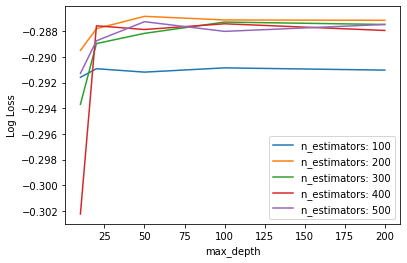

In [35]:
# Create the classifier
clf = RandomForestClassifier()

# Grid search 
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 50, 100, 200]}
grid_search = GridSearchCV(clf, param_grid, scoring="neg_log_loss")
grid_result = grid_search.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
scores = np.array(means).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
for i, value in enumerate(param_grid['n_estimators']):
    pyplot.plot(param_grid['max_depth'], scores[i], label='n_estimators: ' + str(value))
pyplot.legend()
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss');

In [36]:
# Save the best predictor
clf = RandomForestClassifier(n_estimators=400, max_depth=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
performances.loc[performances.shape[0]] = ['RandomForestClassifier_PARAM', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### Performance comparison

In [37]:
performances[(~performances.Model.str.contains('_'))|(performances.Model.str.contains('_PARAM'))]

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score
0,XGBClassifier,0.92,0.92,0.92,0.92
1,LGBMClassifier,0.90,0.90,0.90,0.90
2,RandomForestClassifier,0.87,0.87,0.87,0.87
3,XGBClassifier_PARAM,0.94,0.94,0.94,0.94
4,LGBMClassifier_PARAM,0.92,0.92,0.92,0.91
5,RandomForestClassifier_PARAM,0.87,0.87,0.87,0.86


## Exercici 4

**Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.**

### XGBClassifier CV

In [38]:
# Create the classifier
clf = XGBClassifier()

# Train and make the predictions with CV
y_pred = cross_val_predict(clf, X, y, cv=10)


# Save the metrics
performances.loc[performances.shape[0]] = ['XGBClassifier_CV', 
                                           accuracy_score(y, y_pred), 
                                           balanced_accuracy_score(y, y_pred), 
                                           roc_auc_score(y, y_pred), 
                                           f1_score(y, y_pred)]

### LGBMClassifier CV

In [39]:
# Create the classifier
clf = LGBMClassifier()

# Train and make the predictions with CV
y_pred = cross_val_predict(clf, X, y, cv=10)


# Save the metrics
performances.loc[performances.shape[0]] = ['LGBMClassifier_CV', 
                                           accuracy_score(y, y_pred), 
                                           balanced_accuracy_score(y, y_pred), 
                                           roc_auc_score(y, y_pred), 
                                           f1_score(y, y_pred)]

### RandomForestClassifier CV

In [40]:
# Create the classifier
clf = RandomForestClassifier()

# Train and make the predictions with CV
y_pred = cross_val_predict(clf, X, y, cv=10)


# Save the metrics
performances.loc[performances.shape[0]] = ['RandomForestClassifier_CV', 
                                           accuracy_score(y, y_pred), 
                                           balanced_accuracy_score(y, y_pred), 
                                           roc_auc_score(y, y_pred), 
                                           f1_score(y, y_pred)]

### Performance comparison

In [41]:
performances[(~performances.Model.str.contains('_'))|(performances.Model.str.contains('_CV'))]

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score
0,XGBClassifier,0.92,0.92,0.92,0.92
1,LGBMClassifier,0.90,0.90,0.90,0.90
2,RandomForestClassifier,0.87,0.87,0.87,0.87
6,XGBClassifier_CV,0.93,0.93,0.93,0.92
7,LGBMClassifier_CV,0.91,0.91,0.91,0.90
8,RandomForestClassifier_CV,0.87,0.87,0.87,0.86


## Exercici 5

**Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.**

### Add categorical features

In [42]:
# Select categorical features
features_cat = df.select_dtypes(exclude=np.number).columns.tolist()
features_cat_cod = [col + '_cod' for col in features_cat]

# Join numerical and categorical features
features_all = features + features_cat_cod

In [43]:
# Check missing values
df[features_cat].isnull().sum()

UniqueCarrier       0
TailNum             5
Origin              0
Dest                0
CancellationCode    0
dtype: int64

In [44]:
# Fill the missing values of TailNum with the most common category
df['TailNum'].fillna(df.TailNum.mode().squeeze(), inplace=True)

In [45]:
# Encode the categorical features
encoder = LabelEncoder()
for col in features_cat:
    df[col + '_cod']= encoder.fit_transform(df[col])

In [46]:
# Train test split
sample = pd.concat([df[df[target] == 1].sample(10000, random_state=1),
                    df[df[target] == 0].sample(10000, random_state=1)])
X_train_cat, X_test_cat, y_train, y_test = train_test_split(sample[features_all], y, test_size = 0.25, random_state=1)

In [47]:
clf = XGBClassifier()
clf.fit(X_train_cat, y_train)
y_pred = clf.predict(X_test_cat)
performances.loc[performances.shape[0]] = ['XGBClassifier_FEATURES_cat', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

In [48]:
clf = LGBMClassifier()
clf.fit(X_train_cat, y_train)
y_pred = clf.predict(X_test_cat)
performances.loc[performances.shape[0]] = ['LGBMClassifier_FEATURES_cat', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

In [49]:
clf = RandomForestClassifier()
clf.fit(X_train_cat, y_train)
y_pred = clf.predict(X_test_cat)
performances.loc[performances.shape[0]] = ['RandomForestClassifier_FEATURES_cat', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### Feature transformation: standaritzation

In [50]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [51]:
clf = XGBClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
performances.loc[performances.shape[0]] = ['XGBClassifier_FEATURES_std', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

In [52]:
clf = LGBMClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
performances.loc[performances.shape[0]] = ['LGBMClassifier_FEATURES_std', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

In [53]:
clf = RandomForestClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
performances.loc[performances.shape[0]] = ['RandomForestClassifier_FEATURES_std', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### Feature transformation: normalization

In [54]:
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

In [55]:
clf = XGBClassifier()
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
performances.loc[performances.shape[0]] = ['XGBClassifier_FEATURES_norm', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

In [56]:
clf = LGBMClassifier()
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
performances.loc[performances.shape[0]] = ['LGBMClassifier_FEATURES_norm', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

In [57]:
clf = RandomForestClassifier()
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
performances.loc[performances.shape[0]] = ['RandomForestClassifier_FEATURES_norm', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### Performance comparison

In [58]:
performances[(~performances.Model.str.contains('_'))|(performances.Model.str.contains('_FEATURES_'))]

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score
0,XGBClassifier,0.92,0.92,0.92,0.92
1,LGBMClassifier,0.90,0.90,0.90,0.90
2,RandomForestClassifier,0.87,0.87,0.87,0.87
9,XGBClassifier_FEATURES_cat,0.90,0.90,0.90,0.90
10,LGBMClassifier_FEATURES_cat,0.89,0.90,0.90,0.89
11,RandomForestClassifier_FEATURES_cat,0.87,0.87,0.87,0.86
12,XGBClassifier_FEATURES_std,0.51,0.50,0.50,0.68
13,LGBMClassifier_FEATURES_std,0.51,0.50,0.50,0.68
14,RandomForestClassifier_FEATURES_std,0.51,0.50,0.50,0.68
15,XGBClassifier_FEATURES_norm,0.51,0.50,0.50,0.68


## Exercici 6

**No utilitzis la variable DepDelay a l’hora de fer prediccions.**

In [59]:
X_train.drop('DepDelay', axis=1, inplace=True)
X_test.drop('DepDelay', axis=1, inplace=True)

### XGBClassifier

In [60]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
performances.loc[performances.shape[0]] = ['XGBClassifier_DepDelay', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### LGBMClassifier

In [61]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
performances.loc[performances.shape[0]] = ['LGBMClassifier_DepDelay', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### RandomForestClassifier

In [62]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
performances.loc[performances.shape[0]] = ['RandomForestClassifier_DepDelay', 
                                           accuracy_score(y_test, y_pred), 
                                           balanced_accuracy_score(y_test, y_pred), 
                                           roc_auc_score(y_test, y_pred), 
                                           f1_score(y_test, y_pred)]

### Performance comparison

In [63]:
performances[(~performances.Model.str.contains('_'))|(performances.Model.str.contains('_DepDelay'))]

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score
0,XGBClassifier,0.92,0.92,0.92,0.92
1,LGBMClassifier,0.90,0.90,0.90,0.90
2,RandomForestClassifier,0.87,0.87,0.87,0.87
18,XGBClassifier_DepDelay,0.92,0.93,0.93,0.92
19,LGBMClassifier_DepDelay,0.90,0.90,0.90,0.89
20,RandomForestClassifier_DepDelay,0.86,0.86,0.86,0.84
